# 音檔解析

## 載入相關套件

In [1]:
# 載入相關套件
import IPython

In [2]:
print(IPython.__version__)

8.29.0


## 播放音檔(wav)

In [3]:
# 檔案來源：https://github.com/maxifjaved/sample-files
wav_file = "./audio/WAV_1MG.wav"  #

# autoplay=True：自動播放，不須按 PLAY 鍵
IPython.display.Audio(wav_file, autoplay=False)

## 取得音檔的屬性

In [4]:
# 取得音檔的屬性
import wave

f = wave.open(wav_file)
print(
    f"取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, "
    + f"聲道={f.getnchannels()}, 精度={f.getsampwidth()}, "
    + f"檔案秒數={f.getnframes() / f.getframerate():.2f}"
)
f.close()

取樣頻率=44100, 幀數=99999, 聲道=1, 精度=2, 檔案秒數=2.27


## 使用 PyAudio 函數庫串流播放

In [4]:
!pip install pyAudio

In [ ]:
# 使用 PyAudio 串流播放
import pyaudio


def PlayAudio(filename, seconds=-1):
    # 定義串流區塊大小(stream chunk)
    chunk = 1024
    # 開啟音檔
    f = wave.open(filename, "rb")
    # 初始化 PyAudio
    p = pyaudio.PyAudio()
    # 開啟串流
    stream = p.open(
        format=p.get_format_from_width(f.getsampwidth()),
        channels=f.getnchannels(),
        rate=f.getframerate(),
        output=True,
    )

    # 計算每秒區塊數
    sample_count_per_second = f.getframerate() / chunk

    # 計算總區塊數
    if seconds > 0:
        total_chunk = seconds * sample_count_per_second
    else:
        total_chunk = (
            f.getnframes() / (f.getframerate() * f.getnchannels())
        ) * sample_count_per_second

    print(f"每秒區塊數={sample_count_per_second}, 總區塊數={total_chunk}")

    # 每次讀一區塊
    data = f.readframes(chunk)
    no = 0
    while data:
        # 播放區塊
        stream.write(data)
        data = f.readframes(chunk)
        no += 1
        if seconds > 0 and no > total_chunk:
            break

    # 關閉串流
    stream.stop_stream()
    stream.close()

    # 關閉 PyAudio
    p.terminate()

In [ ]:
# 播放音檔
PlayAudio(wav_file, -1)  # -1:播放完畢

In [7]:
# 播放音檔 3 秒
PlayAudio(wav_file, 3)

每秒區塊數=43.06640625, 總區塊數=129.19921875


## 繪製波形

In [ ]:
# 繪製波形
import numpy as np
import wave
import sys
import matplotlib.pyplot as plt


# 單聲道繪製波形
def DrawWavFile_mono(filename):
    # 開啟音檔
    f = wave.open(filename, "r")

    # 字串轉換整數
    signal = f.readframes(-1)
    signal = np.frombuffer(signal, np.int16)
    fs = f.getframerate()

    # 非單聲道無法解析
    if f.getnchannels() == 1:
        Time = np.linspace(0, len(signal) / fs, num=len(signal))

        # 繪圖
        plt.figure(figsize=(12, 6))
        plt.title("Signal Wave...")
        plt.plot(Time, signal)
        plt.show()
    else:
        print("非單聲道無法解析")

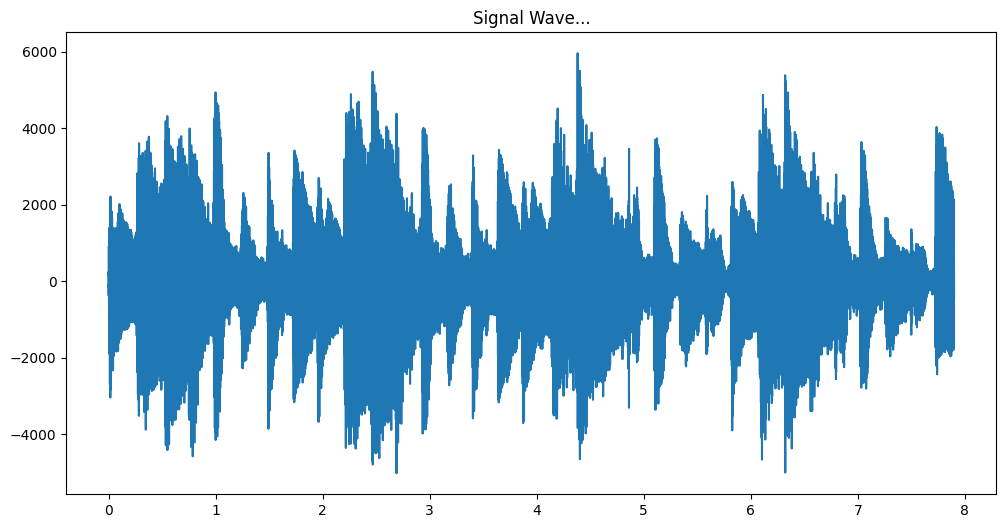

In [ ]:
wav_file = "./audio/down.wav"
DrawWavFile_mono(wav_file)

In [ ]:
# 取得音檔的屬性
f = wave.open(wav_file)
print(
    f"取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, "
    + f"聲道={f.getnchannels()}, 精度={f.getsampwidth()}, "
    + f"檔案秒數={f.getnframes() / f.getframerate():.2f}"
)
f.close()

取樣頻率=22050, 幀數=174195, 聲道=1, 精度=2, 檔案秒數=7.90


In [ ]:
# 多聲道繪製波形
def DrawWavFile_stereo(filename):
    # 開啟音檔
    with wave.open(filename, "r") as wav_file:
        # 字串轉換整數
        signal = wav_file.readframes(-1)
        signal = np.frombuffer(signal, np.int16)

        # 為每一聲道準備一個 list
        channels = [[] for channel in range(wav_file.getnchannels())]

        # 將資料放入每個 list
        for index, datum in enumerate(signal):
            channels[index % len(channels)].append(datum)

        # 計算時間
        fs = wav_file.getframerate()
        Time = np.linspace(
            0, len(signal) / len(channels) / fs, num=int(len(signal) / len(channels))
        )

        f, ax = plt.subplots(nrows=len(channels), ncols=1, figsize=(10, 6))
        for i, channel in enumerate(channels):
            if len(channels) == 1:
                ax.plot(Time, channel)
            else:
                ax[i].plot(Time, channel)

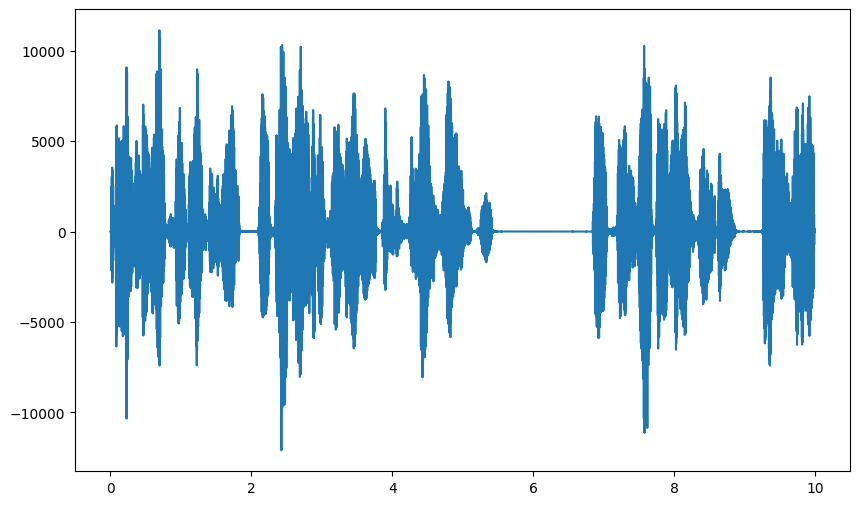

In [ ]:
wav_file = "./audio/mixed.wav"
DrawWavFile_stereo(wav_file)

In [ ]:
# 多聲道繪製波形
def DrawWavFile(wav_file):
    f = wave.open(wav_file)
    channels = f.getnchannels()  # 聲道
    f.close()

    if channels == 1:
        DrawWavFile_mono(wav_file)
    else:
        DrawWavFile_stereo(wav_file)

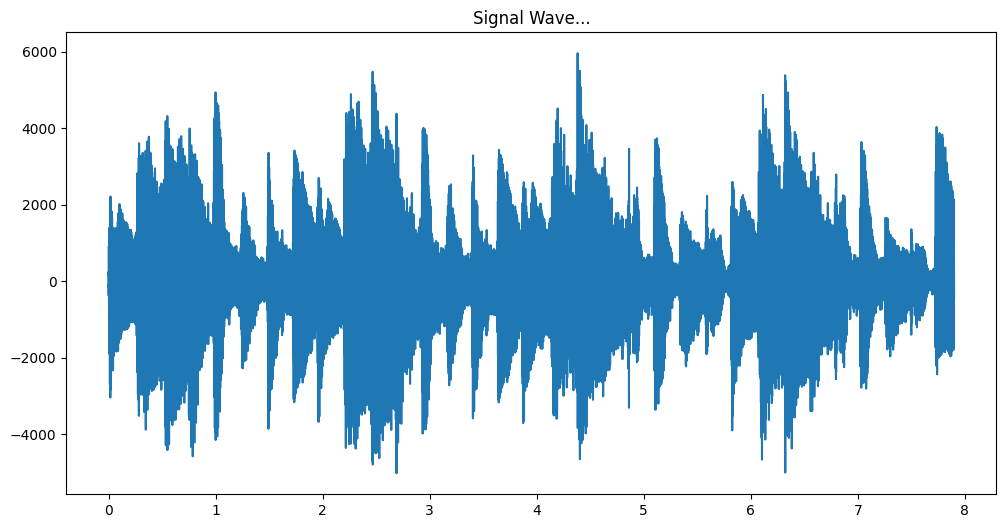

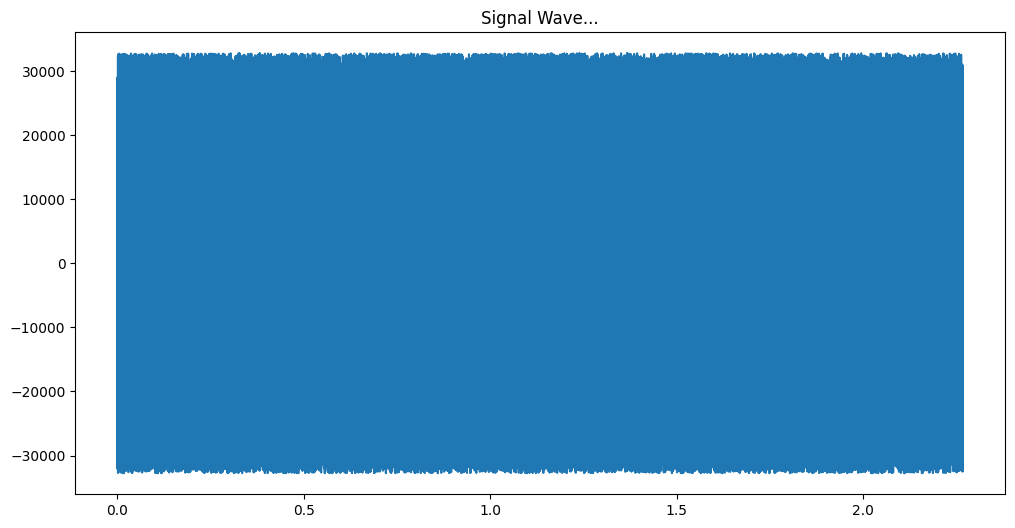

In [ ]:
wav_file = "./audio/down.wav"
DrawWavFile(wav_file)
wav_file = "./audio/WAV_1MG.wav"
DrawWavFile(wav_file)

## 產生音檔

In [ ]:
# 產生音檔
import wave, struct, random

sampleRate = 44100.0  # 取樣頻率
duration = 1.0  # 秒數

wav_file = "./audio/random.wav"
obj = wave.open(wav_file, "w")
obj.setnchannels(1)  # 單聲道
obj.setsampwidth(2)
obj.setframerate(sampleRate)
for i in range(99999):
    value = random.randint(-500, 500)  # -32767, 32767
    data = struct.pack("<h", value)  # <h：short, big-endian
    obj.writeframesraw(data)
obj.close()

IPython.display.Audio(wav_file)

In [ ]:
# 取得音檔的屬性
f = wave.open(wav_file)
print(
    f"取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, "
    + f"聲道={f.getnchannels()}, 精度={f.getsampwidth()}, "
    + f"檔案秒數={f.getnframes() / (f.getframerate() * f.getnchannels()):.2f}"
)
f.close()

取樣頻率=44100, 幀數=99999, 聲道=1, 精度=2, 檔案秒數=2.27


## 雙聲道音檔轉換為單聲道

In [ ]:
# 雙聲道音檔轉換為單聲道
import numpy as np

wav_file = "./audio/WAV_1MG.wav"
# 開啟音檔
with wave.open(wav_file, "r") as f:
    # 字串轉換整數
    signal = f.readframes(-1)
    signal = np.frombuffer(signal, np.int16)

    # 為每一聲道準備一個 list
    channels = [[] for channel in range(f.getnchannels())]

    # 將資料放入每個 list
    for index, datum in enumerate(signal):
        channels[index % len(channels)].append(datum)

    sampleRate = f.getframerate()  # 取樣頻率
    sampwidth = f.getsampwidth()

wav_file_out = "./audio/WAV_1MG_mono.wav"
obj = wave.open(wav_file_out, "w")
obj.setnchannels(1)  # 單聲道
obj.setsampwidth(sampwidth)
obj.setframerate(sampleRate)
for data in channels[0]:
    obj.writeframesraw(data)
obj.close()

In [ ]:
IPython.display.Audio(wav_file_out)

In [ ]:
# 取得音檔的屬性
import wave

f = wave.open(wav_file)
print(
    f"取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, "
    + f"聲道={f.getnchannels()}, 精度={f.getsampwidth()}, "
    + f"檔案秒數={f.getnframes() / f.getframerate():.2f}"
)
f.close()

取樣頻率=44100, 幀數=99999, 聲道=1, 精度=2, 檔案秒數=2.27
